# Feature Scaling Techniques

## Standard Scaler/ z-scale

calculate z-score of each data point. 

Remove mean values(centering) and scale it according to standard deviation.

\begin{align}
    z = \frac{x - \bar{x}}{\sigma}\\
    \text{where }\bar{x} \text{= mean and } \sigma\text{= standard deviation}
\end{align}

`this scaler makes sure that all the features are centered around mean value`

**Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).**

## Robust Scaler

It a variation of standard scaler. replaceing mean with median and std dev with iqr. 

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

\begin{align}
    X_{new} = \frac{x - x_{median}}{IQR}
\end{align}

## Min Max Scaler

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

\begin{align}
    X_{new} = \frac{x - x_{min}}{x_{max} - x_{min}}
\end{align}

`This transformation is often used as an alternative to zero mean, unit variance scaling.`

> Range [0,1]

## Max Absolute Scaler

Scale each feature by its maximum absolute value.

\begin{align}
    X_{new} = \frac{x}{x_{absmax}}
\end{align}

If we do this for all the numerical columns, then all their values will lie between -1 and 1. The main disadvantage is that the technique is sensitive to outliers. 

**It does not shift/center the data, and thus does not destroy any sparsity.**

> Range [-1,1]

## Normalizer

Normalize samples individually to unit norm.

\begin{align}
    X_{new} = \frac{x - \bar{x}}{x_{max} - x_{min}}
\end{align}


If you use l2-normalization, “unit norm” essentially means that if we squared each element in the vector, and summed them, it would equal 1 . (note this normalization is also often referred to as, unit norm or a vector of length 1 or a unit vector )

## Normalizer vs Scaler

Normalizer changes the shape of distribution and scaled changes the range/scale of the data.

## Data based comparison 

In [1]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams.update({
    'axes.grid' : True
})
%matplotlib inline

In [2]:
dataset = load_iris(as_frame=True)

In [6]:
data = dataset.data.values
min_max_scaled = MinMaxScaler().fit_transform(data)
standard_scaled = StandardScaler().fit_transform(data)
normalized = Normalizer().fit_transform(data)
max_abs_scaled = MaxAbsScaler().fit_transform(data)
robust_scaled = RobustScaler().fit_transform(data)

### Box plots to see scales/ranges

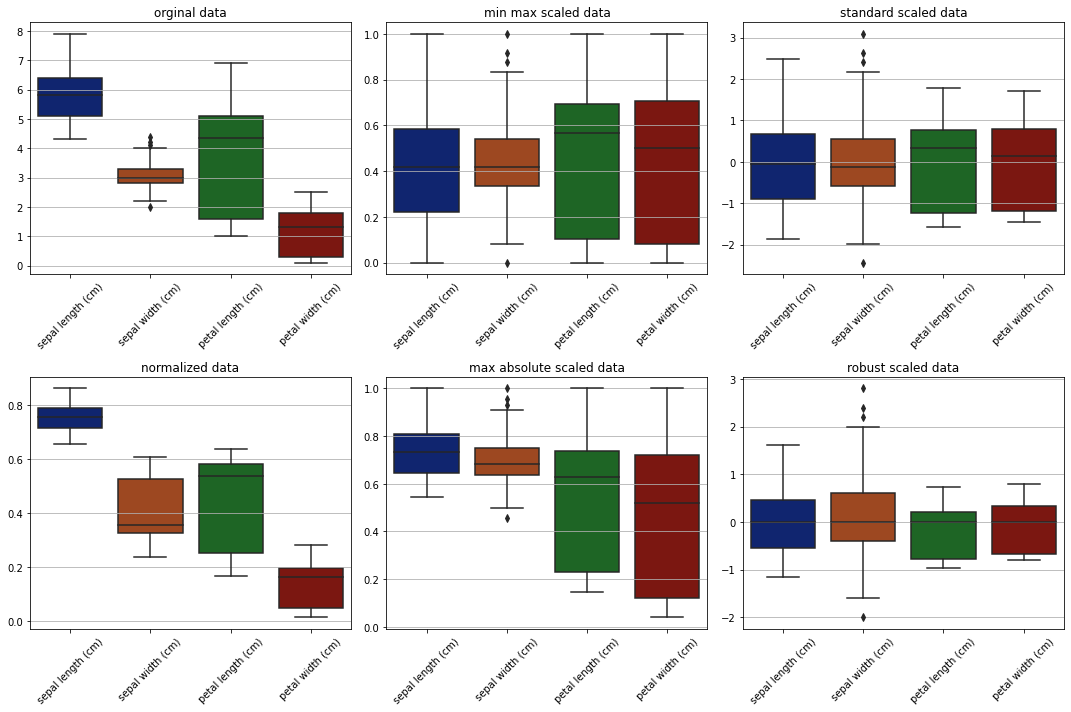

In [13]:
fig, ax = plt.subplots(2, 3, figsize=(15,10))

sns.set_palette('dark')
sns.boxplot(data=data, ax=ax[0][0])
ax[0][0].set_title('orginal data')
# ax[0][0].tick_params(labelrotation=45)
ax[0][0].set_xticklabels(labels=dataset.data.columns,rotation=45)


sns.boxplot(data=min_max_scaled, ax=ax[0][1])
ax[0][1].set_title('min max scaled data')
ax[0][1].set_xticklabels(labels=dataset.data.columns, rotation=45)

sns.boxplot(data=standard_scaled, ax=ax[0][2])
ax[0][2].set_title('standard scaled data')
ax[0][2].set_xticklabels(labels=dataset.data.columns,rotation=45)

sns.boxplot(data=normalized, ax=ax[1][0])
ax[1][0].set_title('normalized data')
ax[1][0].set_xticklabels(labels=dataset.data.columns,rotation=45)

sns.boxplot(data=max_abs_scaled, ax=ax[1][1])
ax[1][1].set_title('max absolute scaled data')
ax[1][1].set_xticklabels(labels=dataset.data.columns,rotation=45)

sns.boxplot(data=robust_scaled, ax=ax[1][2])
ax[1][2].set_title('robust scaled data')
ax[1][2].set_xticklabels(labels=dataset.data.columns, rotation=45)

plt.tight_layout()
plt.show()


From the plots obeservations - 

1. Original data is ranging between 0 and 8.
2. standard scaler and robust scaler scaled data around the center. 
    but robust scaler effectively working good with outliers and aligned with medians.
3. max absolute data is shifted in range but the data is not moved to center.

### Check distribution for single features scales

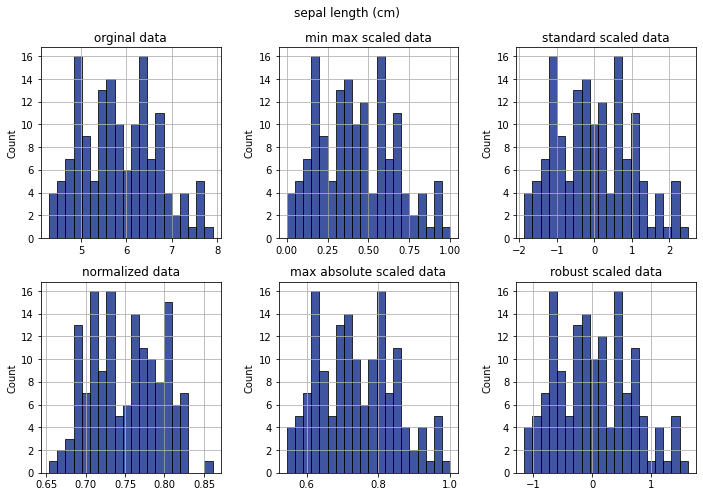

In [22]:
feature_idx = 0
fig, ax = plt.subplots(2, 3, figsize=(10,7))

sns.histplot(data=data[...,feature_idx], ax=ax[0][0], bins=20)
ax[0][0].set_title('orginal data')

sns.histplot(data=min_max_scaled[...,feature_idx], ax=ax[0][1], bins=20)
ax[0][1].set_title('min max scaled data')

sns.histplot(data=standard_scaled[...,feature_idx], ax=ax[0][2], bins=20)
ax[0][2].set_title('standard scaled data')

sns.histplot(data=normalized[...,feature_idx], ax=ax[1][0], bins=20)
ax[1][0].set_title('normalized data')

sns.histplot(data=max_abs_scaled[...,feature_idx], ax=ax[1][1], bins=20)
ax[1][1].set_title('max absolute scaled data')

sns.histplot(data=robust_scaled[...,feature_idx], ax=ax[1][2], bins=20)
ax[1][2].set_title('robust scaled data')

plt.suptitle(dataset.data.columns[feature_idx])
plt.tight_layout()
plt.show()


### Violin plots

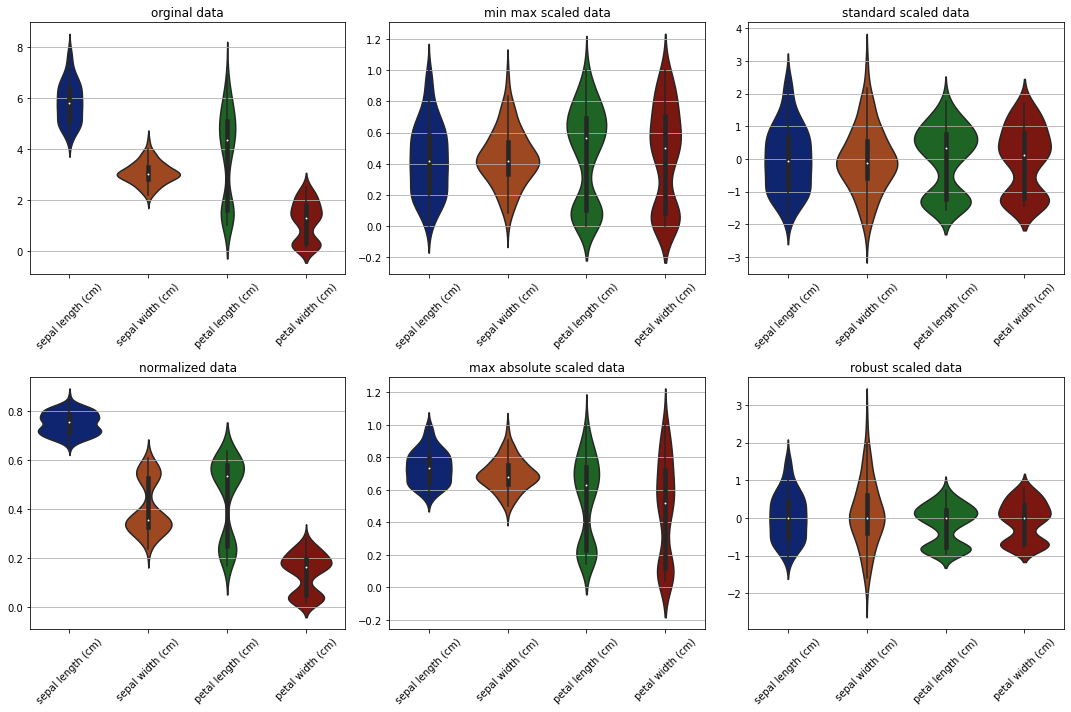

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

sns.violinplot(data=data, ax=ax[0][0])
ax[0][0].set_title('orginal data')
# ax[0][0].tick_params(labelrotation=45)
ax[0][0].set_xticklabels(labels=dataset.data.columns, rotation=45)


sns.violinplot(data=min_max_scaled, ax=ax[0][1])
ax[0][1].set_title('min max scaled data')
ax[0][1].set_xticklabels(labels=dataset.data.columns, rotation=45)

sns.violinplot(data=standard_scaled, ax=ax[0][2])
ax[0][2].set_title('standard scaled data')
ax[0][2].set_xticklabels(labels=dataset.data.columns, rotation=45)

sns.violinplot(data=normalized, ax=ax[1][0])
ax[1][0].set_title('normalized data')
ax[1][0].set_xticklabels(labels=dataset.data.columns, rotation=45)

sns.violinplot(data=max_abs_scaled, ax=ax[1][1])
ax[1][1].set_title('max absolute scaled data')
ax[1][1].set_xticklabels(labels=dataset.data.columns, rotation=45)

sns.violinplot(data=robust_scaled, ax=ax[1][2])
ax[1][2].set_title('robust scaled data')
ax[1][2].set_xticklabels(labels=dataset.data.columns, rotation=45)


plt.tight_layout()
plt.show()
